In [13]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt

import re
import time
import datetime

import seaborn as sn

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import en_core_web_sm
import string
from tqdm import tqdm
tqdm.pandas()

In [14]:
review_comics = pd.read_json('books_review_comics_final.json')
review_thriller = pd.read_json('books_review_thriller.json')

In [15]:
comics_review_texts = review_comics[['review_text']]

In [16]:
def clean_data(df):
    total_time = 0
    start = time.time()
    
    review = pd.DataFrame()
    #combine title, abstract and full_literature to text column
    review['text'] = df['review_text']
    
    #convert text to lower case
    review['text']  = review['text'].str.lower()
    
    #remove punctuations
    #remove all non alphabetic characters
    regex_1 = re.compile(r'[^a-zA-Z]')
    review['text'] = pd.Series(review['text']).str.replace(regex_1, ' ')
    
    #reduce multi-space to single space
    regex_2 = re.compile(r' +')
    review['text'] = pd.Series(review['text']).str.replace(regex_2,' ')
   
    stop = time.time()
    duration = stop-start
    total_time = total_time + duration
    time_taken = str(datetime.timedelta(seconds=total_time))    
    print("Time taken/file :",duration)
    print("Total duration :",time_taken)
    
    return review

In [17]:
comics_review_texts = clean_data(comics_review_texts)

Time taken/file : 18.86436915397644
Total duration : 0:00:18.864369


In [18]:
comics_review_texts.head()

,text
0,sherlock holmes and the vampires of london rel...
1,i ve never really liked spider man i am howeve...
2,i ve been waiting so long for this i first stu...
3,the only thing more entertaining than this boo...
4,this wasn t my favourite black butler book i w...


In [19]:
#stopwords
stopwords = list(STOP_WORDS)
len(stopwords)

326

In [20]:
#get punctuations
punctuations = string.punctuation

In [21]:
nlp = spacy.load('en_core_web_sm')

In [22]:
def tokenizer(text):
    tokens = nlp(text)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords and word not in punctuations ]
    s = " "
    tokens = s.join(tokens)
    return tokens

In [23]:
tqdm.pandas()
comics_review_texts['text'] = comics_review_texts["text"].progress_apply(tokenizer)

100%|██████████| 330052/330052 [1:19:25<00:00, 69.26it/s]  


In [13]:
def cloud(df):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df))
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

__Comics & graphics__

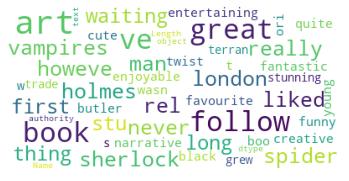

In [14]:
cloud(comics_review_texts['text'])

__Thriller__

In [16]:
thriller_review_texts = review_thriller[['review_text']]

In [17]:
thriller_review_texts = clean_data(thriller_review_texts)

Time taken/file : 71.017657995224
Total duration : 0:01:11.017658


__Mystery Crime and thriller__

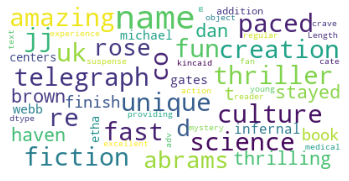

In [18]:
cloud(thriller_review_texts['text'])